Elijah Burns <br/>
Phys 434 <br/>
Lab 3

In [51]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats

#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (20,15)

**Problem 1**

**In our first example we are looking at the temperature reading (meta-data) associated with an experiment. For the experiment to work reliably, the temperature should be at around 12 Kelvin, and if we look at the data it is mostly consistent with 12 Kelvin to within the 0.4 degree precision of the thermometry and the thermal control system (standard deviation). However, there are times when the thermal control system misbehaved and the temperature was not near 12 K, and in addition there are various glitches in the thermometry that give anomalously high and low readings (the reading does not match the real temperature). We definitely want to identify and throw out all the data when the thermal control system was not working (and the temperature was truly off from nominal). While it is possible to have an error in the thermometry such that the true temperature was fine, and we just had a wonky reading, in an abundance of caution we want to throw those values out too.**

**A) So our goal is to identify bad data and throw it out.**

**1.Start by exploring the data you have created with appropriate plots<br/>
2.State the statistical question in words. Be very clear, and describe why you have chosen this statistical question.<br/>
3.Restate your question in math. Be very clear.<br/>
4.Apply your statistical test and construct a truth table.**

**The idea is how often you kept the known good data (True T & Your Test Good), how often you correctly discarded bad data (Bad T & Your Test Bad), and how often mistakes were made of either omission or commission (off diagonals).**

**B) How does the number of omissions, where you threw out good data, depend on the statistical threshold you chose and is it a predictable quantity?**

**C) Are there mistakes of commission (bad data getting in)? If yes, are they avoidable and how do they depend on your statistical threshold?**

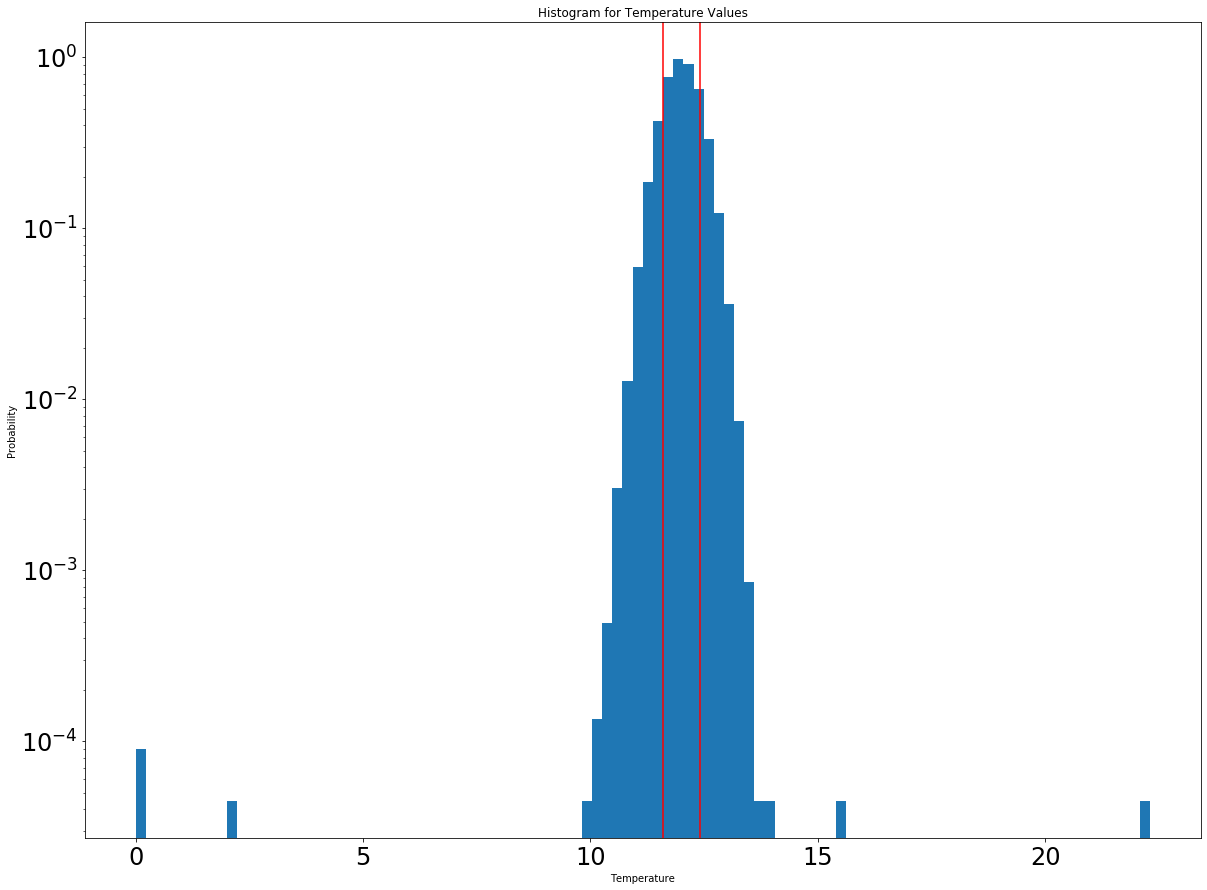

In [52]:
d = np.append(stats.norm.rvs(loc = 12., scale = 0.4, size = 100000), [10., 10.3, 2.1, 0., 0., 15.6, 22.3, 12.7])
fig, ax = plt.subplots(1, 1)
ax.hist(d,100, density=True)
plt.tick_params(labelsize = 24)
plt.axvline(12.4, color='r')
plt.axvline(11.6, color='r')
plt.yscale('log')
plt.xlabel('Temperature')
plt.ylabel('Probability')
plt.title('Histogram for Temperature Values')
#x = np.linspace(4.95,5.05,1000)
#ax.plot(x,stats.norm.pdf(x,loc = 5., scale = 0.01),linewidth = 8,alpha = 0.7)
plt.show()

Question 1, Part A, Section 2 <br/>
The statistical question: What is the probability of getting a temperature reading at or above 12.4 OR at or below 11.6? 
<br/>I chose this question because the problem states that most of the data is within .4 degrees Kelvin of 12 degrees Kelvin. It also states that in addition to the bad data, we should also throw out 'wonky' readings out of an abudance of caution. So because of this we will define the region of 'good' data to be that which is between 12+-.4 degrees Kelvin.

Question 1, Part A, Section 3 <br/>
The integral form of the question above is the following: <br/>

The probability would be the sum of two integrals, the first would be the integral of the pdf from negative infinty to 11.6,the second would be the integral of the pdf from 12.4 to infinity.

In [53]:
#Question 1, Part A, Section 4
#Applying statistical test
counter = 0
for i in range(len(d)):
    if d[i]<=11.6 or d[i]>=12.4:
        counter = counter+1
print('Counter:',counter)

#And doing the integrals for the statistical tests
low_per = stats.norm.cdf(11.6,loc=12,scale=.4)
high_per = 1-stats.norm.cdf(12.4,loc=12,scale=.4)

print('Probability Below 11.6:',low_per)
print('Probability Above 12.4:',high_per)

Counter: 31479
Probability Below 11.6: 0.15865525393145685
Probability Above 12.4: 0.15865525393145685


We know all of our bad values were caught by this filter, so to construct the truth table, we will say the number of True T is the number of counter - 8 (the number of bad data we included)

|  | True T | Bad T |
| --- | --- | --- |
| Your Test Good | 68126 | 0 |
| Your Test Bad | 31874 | 8 |

<br/>
Problem 1, Part B <br/>
The number of omissions we get depends on how wide you define for your range of good data based on the mean of the data distribution. In other words, the amount of data you omit is dependent on how much data you include in relation to the mean. This value is predictable as long as you know the distribution because then you can put the distribution through a cdf function. We can see how the value is predictable because in the truth table we get roughly 32,000 omissions, and when we put the distribution through the cdf, we found the probability of getting a signal outside our specified range to be about 32%, and 32% of 100,000 data points is 32,000. So if you know the distribution, you could predict how many good data points will be thrown out based on the cdf of the distribution.

Problem 1, Part C <br/> 
Because our definition for good data was defined so narrowly for this case, we had no commissions because all the 'bad' data that we specfically included were outside of the range we defined for 'good' data. <br/>
The amount of commissions we have is also dependent on the statistical threshold because if you widen your range of acceptable data, you will increase your chance of having commissions. <br/>
It should also be noted that even though all the bad data was thrown out because the range we defined for 'good' data was so narrow, we also omitted a significant portion of the good data. So even though commissions were avoided in this scenario, it may not have been the best option because of how much good data was labelled as bad data. A better option may have been to expand the range of what we call good data, which would have allowed more comissions, but also would've included more good data.

**Problem 2**

**In this example we will be looking for asteroids. If we look at the alignment of stars on subsequent images, they don't perfectly align due to atmospheric and instrumental effects (even ignoring proper motion). The resulting distribution is two dimensional, and for this lab let's assume it is a 2D Gaussian with 1 arcsecond RMS. Or said another way, if I histogram how far all the (stationary) stars appear to have moved I get something like:**

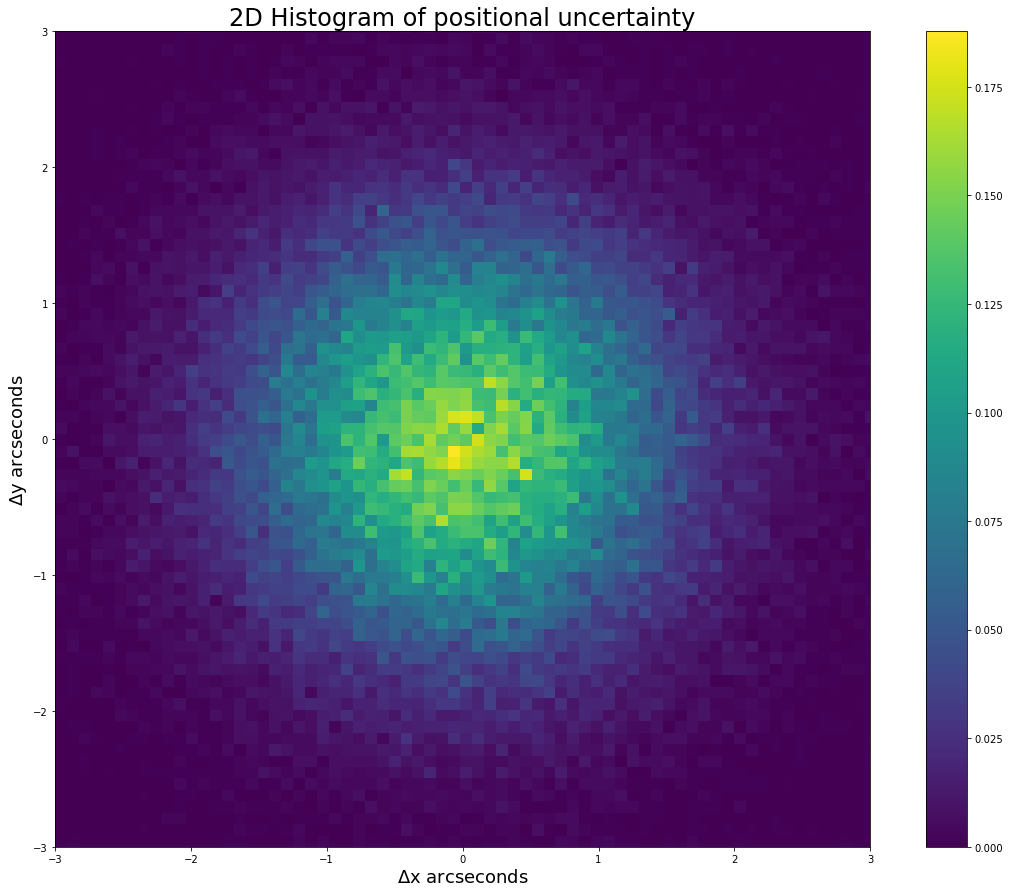

In [54]:
a = np.vstack((stats.norm.rvs( scale = 1, size = 100000), stats.norm.rvs( scale = 1, size = 100000)))
a.shape
fig, ax = plt.subplots(1, 1)
h = ax.hist2d(a[0,:],a[1,:],bins=100, density=True);
ax.set_aspect('equal', 'box')
plt.xlim([-3 , 3])
plt.ylim([-3 , 3])
plt.title("2D Histogram of positional uncertainty", fontsize = 24)
plt.ylabel("$\Delta$y arcseconds", fontsize = 18)
plt.xlabel("$\Delta$x arcseconds", fontsize = 18)
plt.colorbar(h[3], ax=ax)

**If I have a potential asteroid, it will have some true movement between the images. We would like a '5 sigma' detection of movement. What is that distance in arcseconds?**

**1.What is the question in words?**<br/>
**2.What is the question in math? [Hint: Come up with an analytic description of your pdf(). The Blue Book may be helpful here.]**<br/>
**3.What distance in arcseconds represents a 5 sigma detection of motion?**<br/>

Question 2, Part 1 <br/>
Statistical Question: How far must a potential asteroid travel, measured in arcseconds, in order to produce a probability that is associated with 5 sigma? 

Question 2, Part 2 <br/>
We know the probability of getting a detection of 5 sigma is about 1 in 3.5 million. So the integral we are interested in taking is that of the distribution above to find the lower bound such that the integral is equal to the 5 sigma probability.
<br/>
\begin{equation*}
\int_{x}^{\infty} pdf(x) \,dx
\end{equation*}
<br/>
Where we are looking for x. <br/>
<br/>
Since this is a 2D distribution with independent variables, we can see from [Wikipedia](https://en.wikipedia.org/wiki/Normal_distribution#Combination_of_two_independent_random_variables) that this is in fact a Rayleigh distribution. So instead of performing a ppf on the two independent Gaussian functions, we can do a ppf on the Rayleigh distribution to find the distance the asteroid needs to travel in arcseconds. <br/>
<br/>

In [55]:
prob5sigma = 1-1/(3.5e6)
dist3 = stats.rayleigh.ppf(prob5sigma, scale = 1, loc=0)
print('Distance Asteroid needs to travel to be significant',dist3,'arcseconds')

Distance Asteroid needs to travel to be significant 5.489676406965609 arcseconds


**Problem 3**
**As we discussed in class, one of the key backgrounds for gamma-ray telescopes are cosmic rays. Cosmic rays are charged particles—usually protons or electrons but can include atomic nuclei such a alpha particles (helium) or iron. Because of their charge cosmic rays spiral in the magnetic field of the galaxy. From the perspective of the Earth they appear to be coming uniformly from all directions like a high energy gas, and the direction the cosmic ray is travelling when it reaches the Earth tells us nothing about where it came from because we don't know what tortured path it has taken through the galaxy to reach us. However, at trillion electron volt energies and above, the spiral loops are fairly big and the sun and the moon will block cosmic rays. This means the sun and the moon appear as holes in the cosmic ray sky (cosmic rays from that direction are absorbed).**

**Assume in a moon sized patch on the sky we normally have a cosmic ray rate of 1 cosmic ray per minute (arrivals are random in time). If we can observe where the moon is for 8 hours per night (not too close to the horizon) and we observe for 15 days and see 6800 cosmic rays, what is the signficance of our moon shadow detection?**

**As always:**

**1.What is the question in words?**<br/>
**2.Translate the question to math, describing both the expected background pdf() and the integral you need to do.**<br/>
**3.Convert to sigma.**<br/>
**There are some unique aspects to this problem. Make sure you explore them in your explanation.**

Problem 3, Part 1 <br/>
If you look in any moon sized patch of sky, you would expect to see an average of 7200 cosmic rays under the conditions described above. If you see less however, it could be significant because it could mean the moon has appeared in that section of the sky for which you are observing.
The statistical question: If you look in a moon-sized patch of sky, and you want to determine the amount of space the moon is obscuring in your observation patch, what is the probability you see less than 7200 cosmic rays in the time period described?





Problem 3, Part 2: <br/>
The expected background pdf() for these conditions would be a Poisson distribution because the question states that from the perspective of earth, the cosmic rays appear to be coming from all directions uniformly, however the distribution must be discrete because you can't have observe something like 1.3 cosmic rays in one minute, it doesn't make sense because the number of cosmic rays you observe must be whole numbers. For the integral, since we are interested in finding the probability of getting a signal that is less than 7200 cosmic rays in the time period described in the question, we will want to integrate the Poisson distribution from negative infinity to 6800 to find the probability. <br/>
\begin{equation*}
\int_{-\infty}^{6800} pdf(x) \,dx
\end{equation*}
<br/>
Then we can convert the probability into a sigma value.

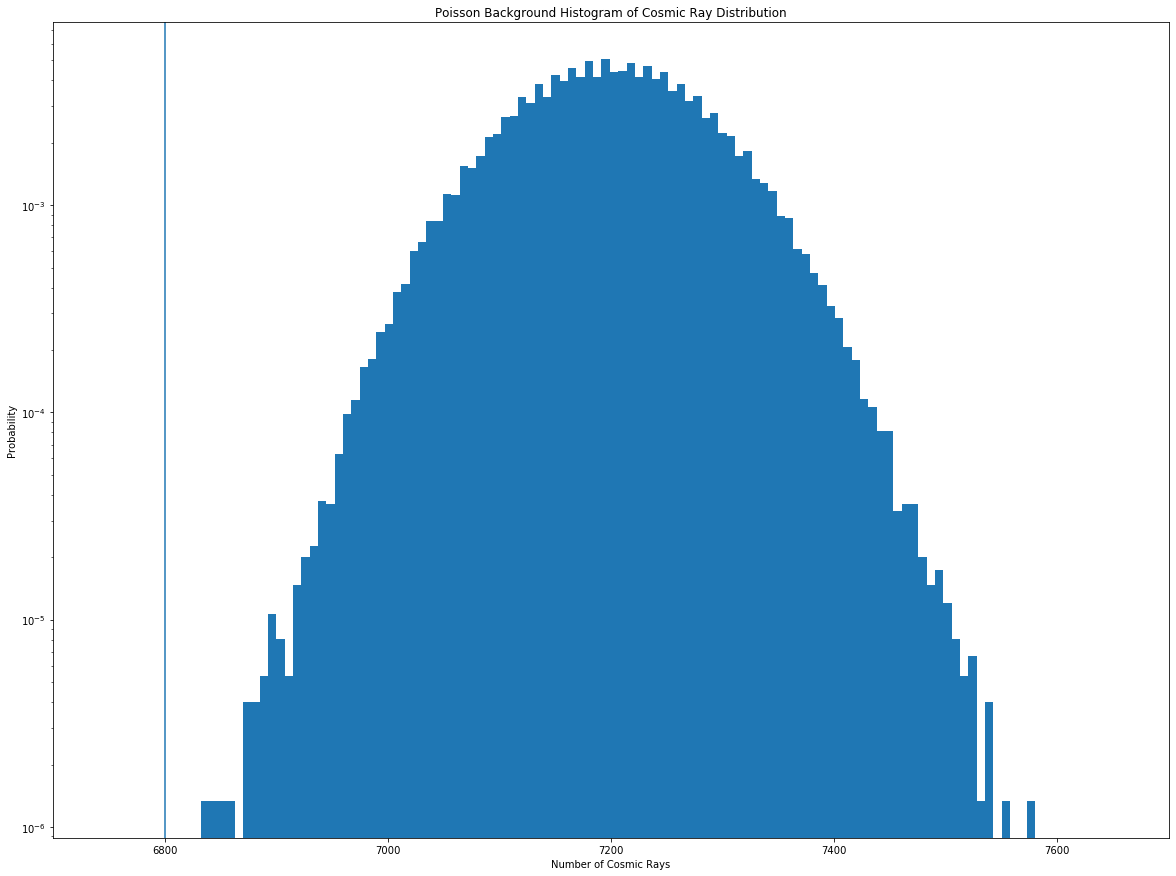

In [58]:
pois_dist = scipy.stats.poisson.rvs(mu=7200,loc=0,size=100000)
x = np.linspace(6500,7500,len(pois_dist))

plt.hist(pois_dist,100,density=True)
plt.yscale('log')
plt.xlabel('Number of Cosmic Rays')
plt.ylabel('Probability')
plt.xlim([6700,7700])
plt.axvline(6800)
plt.title('Poisson Background Histogram of Cosmic Ray Distribution')
plt.show()

In [ ]:
prob = stats.poisson.cdf(k=6800, mu=7200)
print('Probability: ',prob)

sig = stats.norm.ppf(1-prob)
print('Sigma: ',sig)

Problem 3, Part 3 <br/>
As shown in the histogram, most of the values for cosmic rays received fall within a range of + or - 200 from the mean. Because 6800 is 400 cosmic rays less than the mean, we see that it is not very likely that the background would produce this result, meaning the moon could be partially obstructing the view of the detector. We see the probability of measuring 6800 cosmic rays or less is very small, however it would not quite be a significant discovery because the sigma associated with the probability is just shy of the 5 sigma point, at 4.75 sigma. To get above the 5 sigma threshold, you would need to measure only about 25 less cosmic rays, or 6775 cosmic rays. 

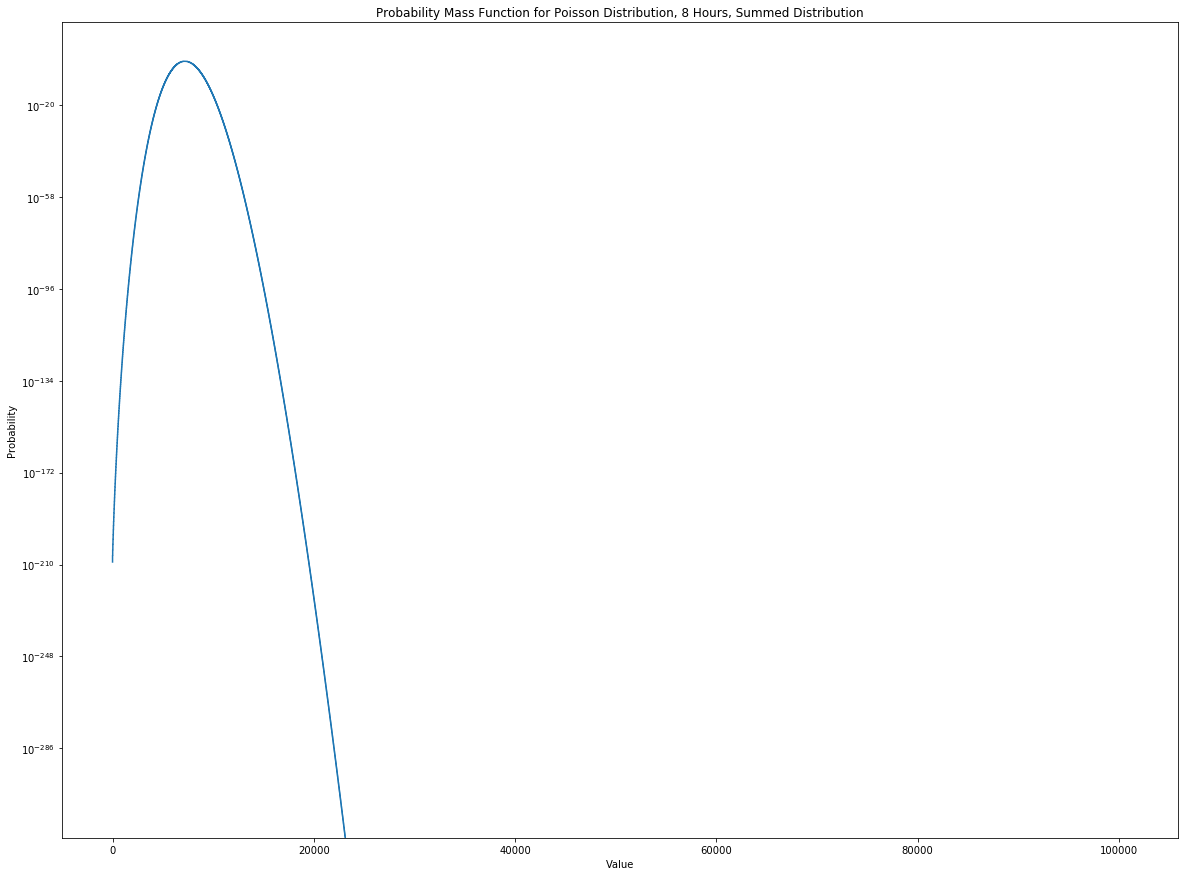

In [61]:
xlow = 0
xhigh = 14
xspace = 15
x = np.linspace(xlow,xhigh,xspace)

pois_dist = scipy.stats.poisson.pmf(x,mu=1, loc=0)
pois_dist = pois_dist/sum(pois_dist)
comb = pois_dist

k=480
for i in range(k):
    comb = np.convolve(comb,pois_dist)
    
cx = np.linspace(xlow*k*15,xhigh*k*15,len(comb))
plt.step(cx,comb)
plt.yscale('log')
plt.xlabel('Value')
plt.ylabel('Probability')
plt.title('Probability Mass Function for Poisson Distribution, 8 Hours, Summed Distribution')
plt.axvline(72)
plt.show()